# Advanced Multivariate Statistics project

We will analyze Kaggle Pokemon dataset which is taken from here https://www.kaggle.com/datasets/alopez247/pokemon

In [1]:
from utils import *

%matplotlib inline

In [2]:
raw_data = pd.read_csv("pokemons.csv")

print("%d - TRAIN number of samples" % raw_data.shape[0])
print("%d - TRAIN number of columns \n" % raw_data.shape[1])
raw_data.head()

721 - TRAIN number of samples
23 - TRAIN number of columns 



,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
const_features = [f for f in raw_data.columns if raw_data[f].nunique() == 1]
if const_features:
    print("WARNING! Detected %d columns in training with constant values." % len(const_features))
print(const_features)

[]


In [4]:
# Manual definition of categorical and numerical features
all_cat_features = ["Type_1", "Type_2", "Generation", "Color", "hasGender", 
                "Egg_Group_1", "Egg_Group_2", "Body_Style", "isLegendary", "hasMegaEvolution"]
all_num_features = ["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", 
                "Pr_Male", "Height_m", "Weight_kg", "Catch_Rate"]
bin_target_col = "hasMegaEvolution"
num_target_col = "Catch_Rate"

for c in all_cat_features:
    if raw_data[c].dtype == bool:
        raw_data[c] = raw_data[c].astype(int)

In [5]:
cat_features = [c for c in all_cat_features if c != bin_target_col]
num_features = all_num_features
features = cat_features + num_features

print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")
print(f"Binary target: {bin_target_col}")

Numerical features: ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']
Categorical features: ['Type_1', 'Type_2', 'Generation', 'Color', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style', 'isLegendary']
Binary target: hasMegaEvolution


## Data quality checks

Features and their missing percentages

In [6]:
miss = (raw_data.isnull().sum() / raw_data.shape[0] * 100).to_frame()
miss.columns = ["miss_perc"]
miss[miss["miss_perc"] > 0].sort_values("miss_perc", ascending=False)

,miss_perc
Egg_Group_2,73.509015
Type_2,51.456311
Pr_Male,10.679612


In [7]:
# Cast categorical features to string to avoid future inconsistencies
# That automatically does the conversion of NaN type to string 'nan' which acts as if an additional category was created
for c in cat_features:
    raw_data[c] = raw_data[c].astype(str)

# Fill in NaN values
raw_data["Pr_Male"] = raw_data["Pr_Male"].fillna(0.5)

## EDA

In [8]:
raw_data.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,0.547677,0.063800,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,0.189693,0.244566,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,0.500000,0.000000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,0.500000,0.000000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,0.500000,0.000000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,1.000000,1.000000,14.500000,950.000000,255.000000


In [9]:
vis_num_features = num_features

vis_cat_features = cat_features

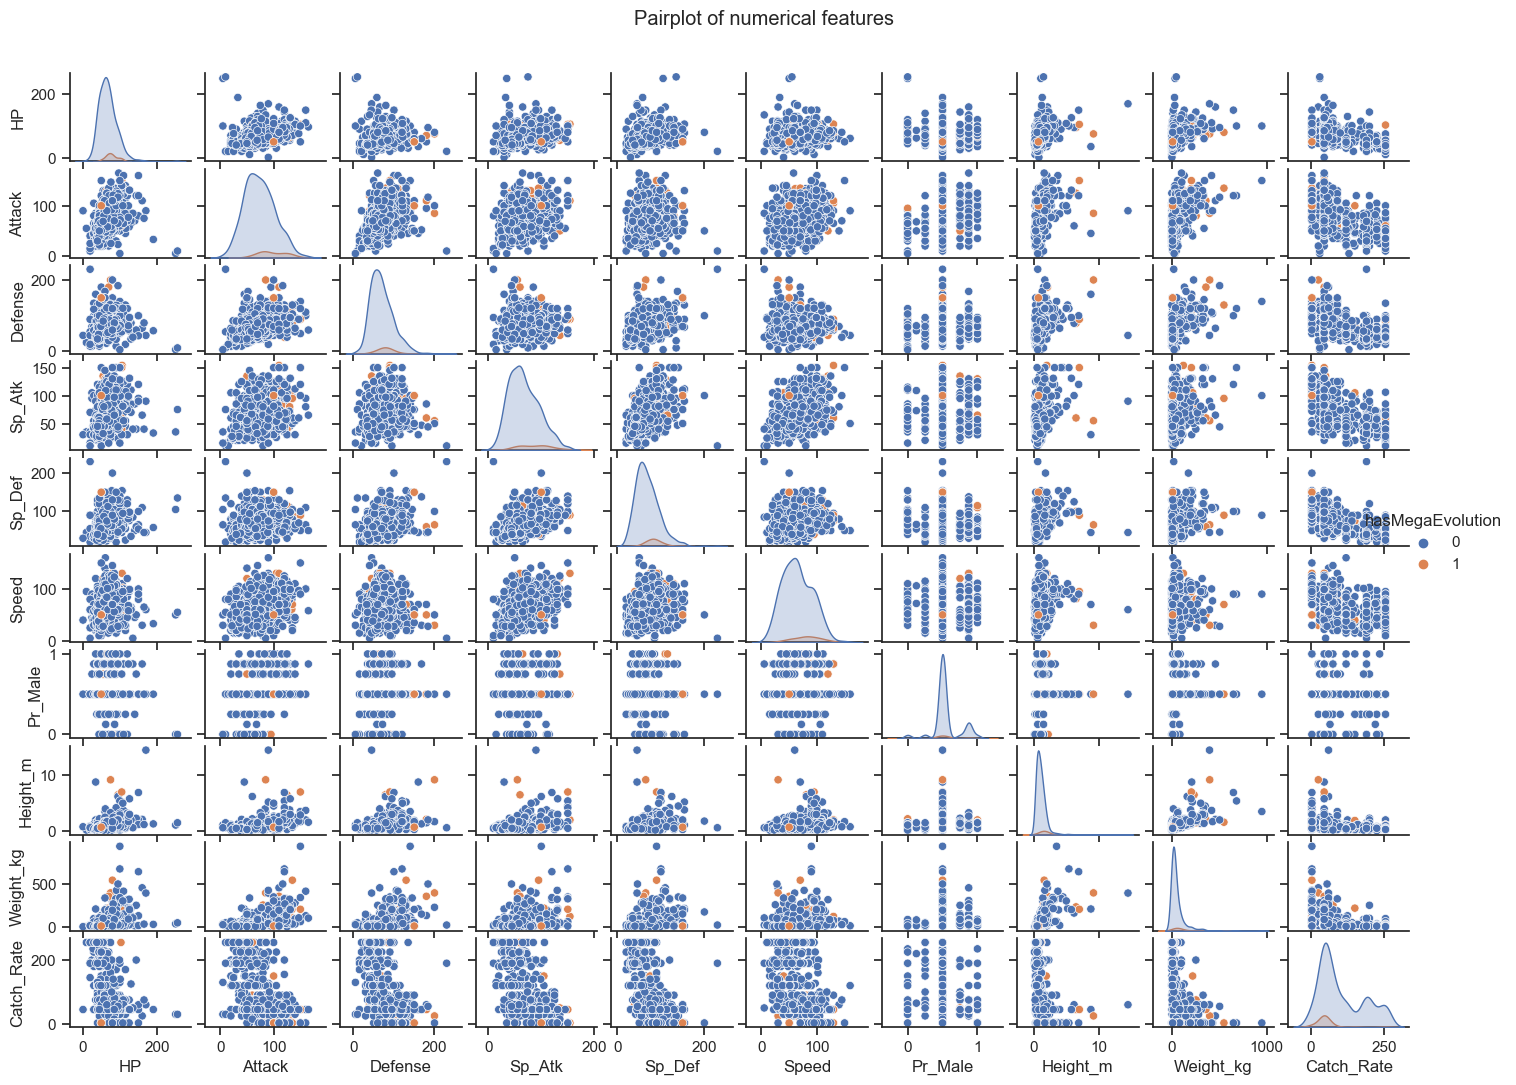

In [10]:
pairplot = sns.pairplot(raw_data, hue=bin_target_col, vars=vis_num_features)
pairplot.fig.set_size_inches(15,10)
pairplot.fig.suptitle("Pairplot of numerical features", y=1.05);

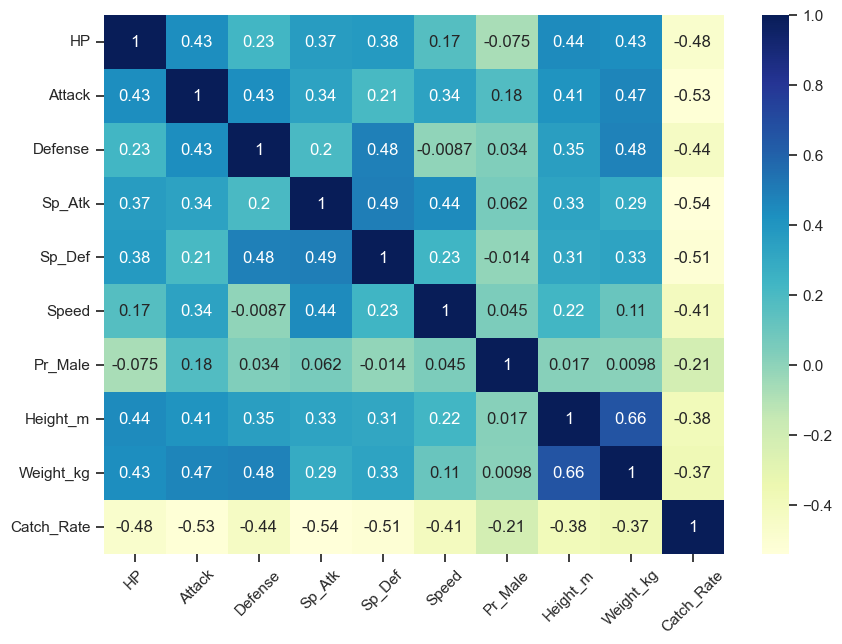

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(raw_data[num_features].corr(), cmap="YlGnBu", annot=True)
plt.xticks(rotation=45);

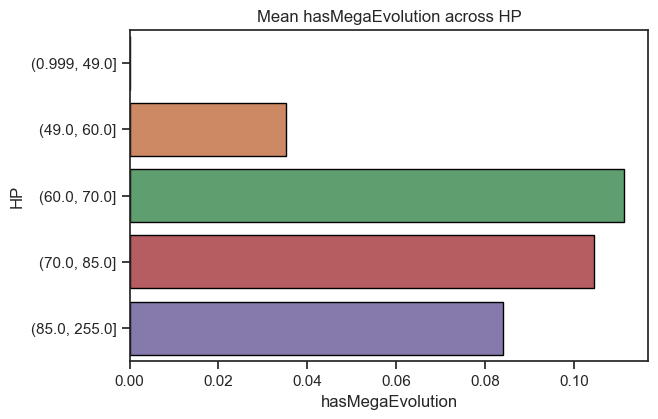

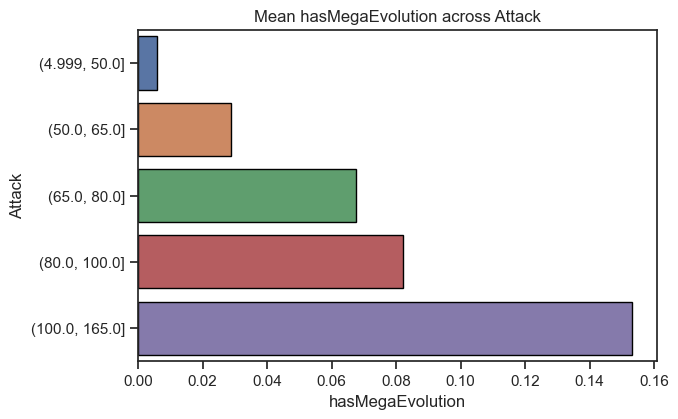

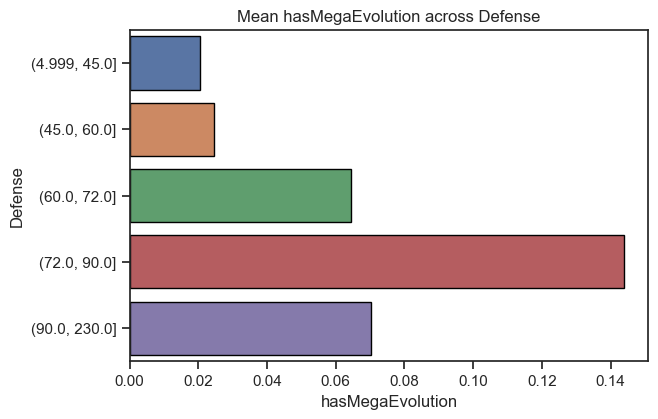

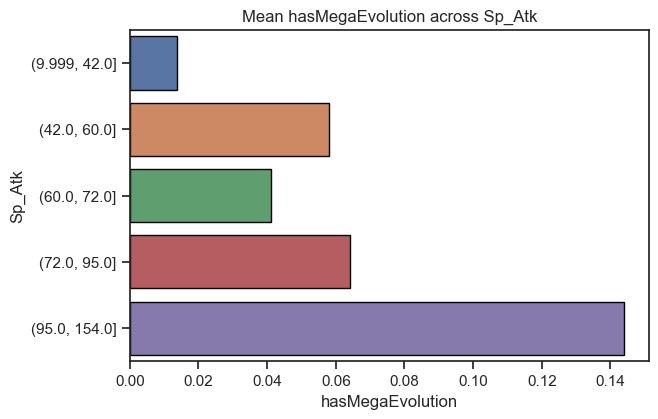

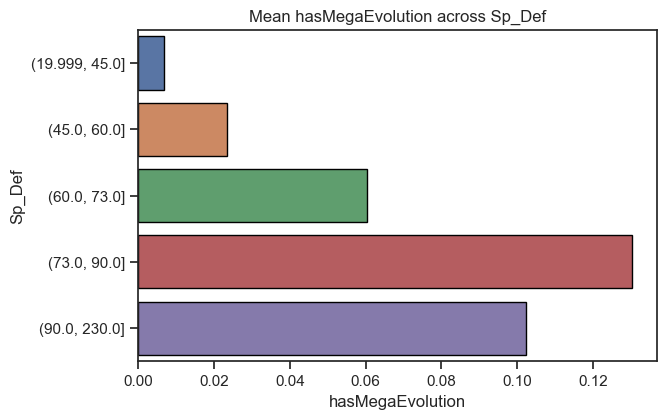

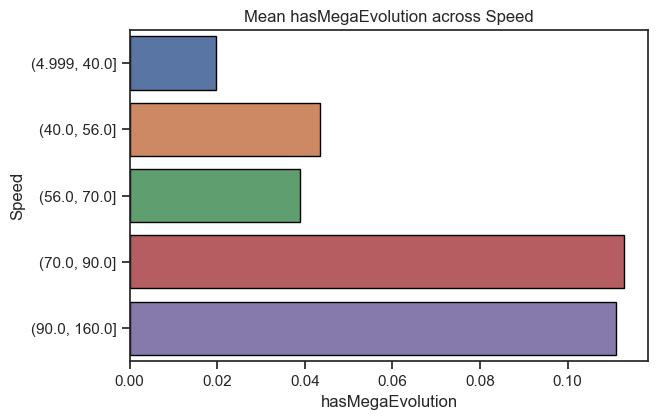

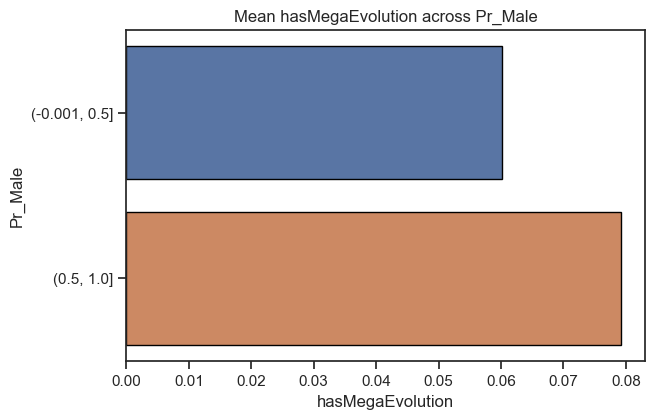

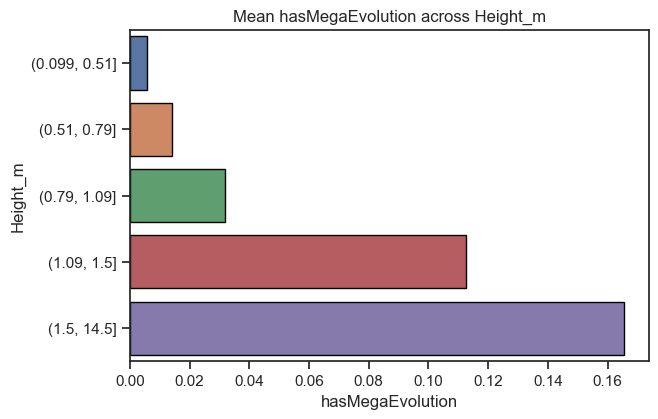

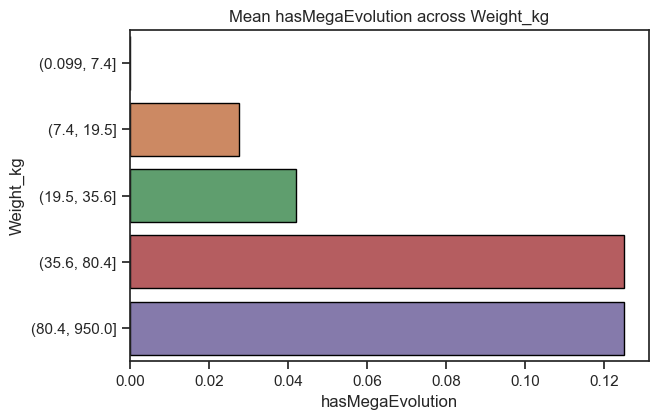

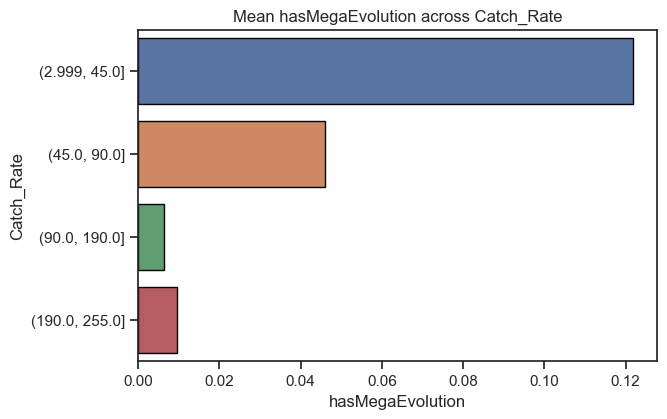

In [12]:
for feat in vis_num_features:
    num_bar_plot(raw_data, bin_target_col, feat);

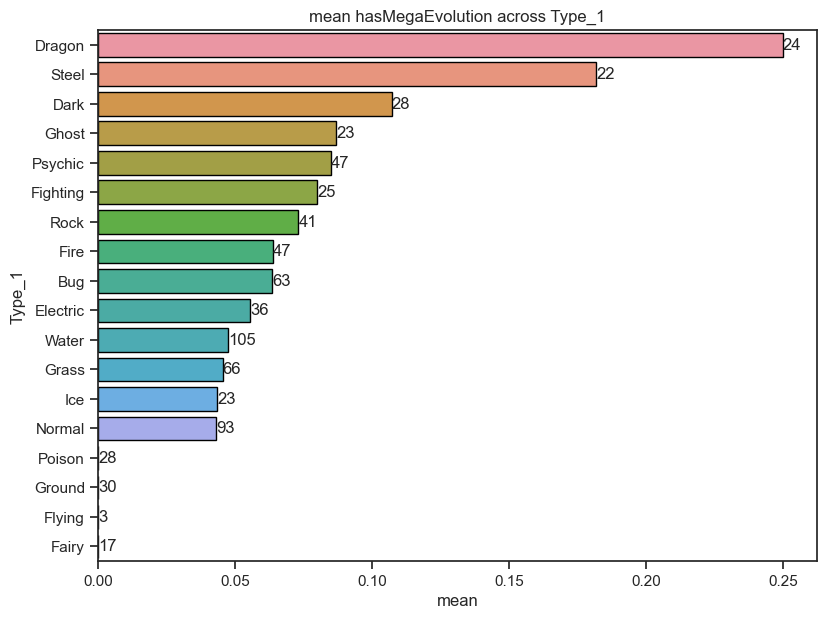

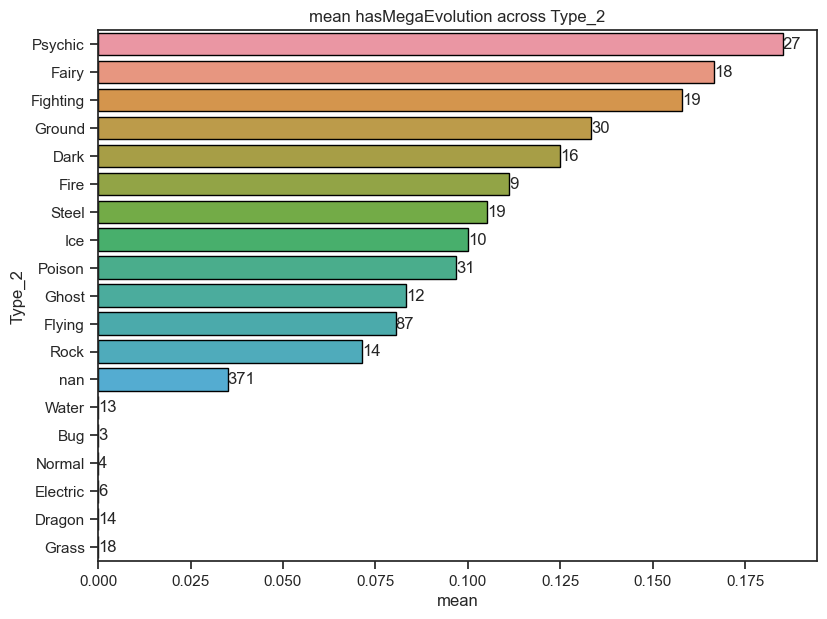

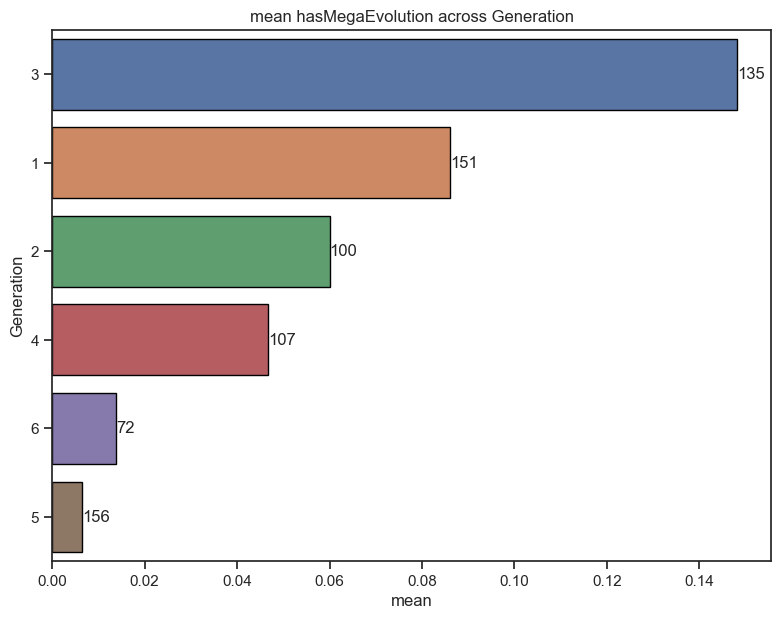

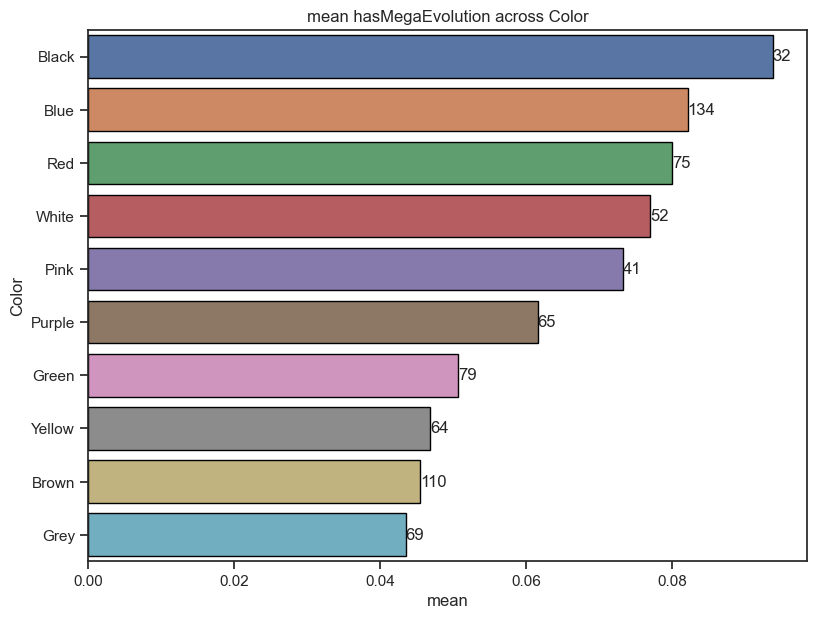

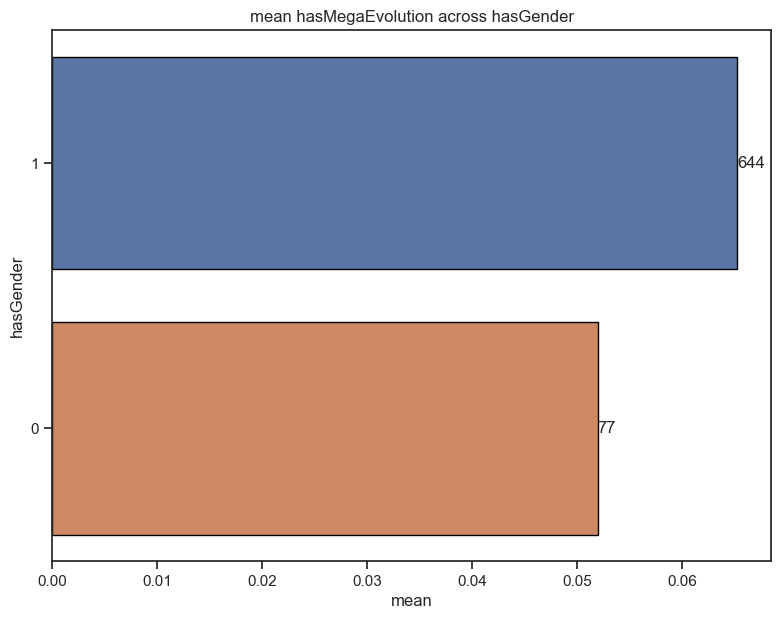

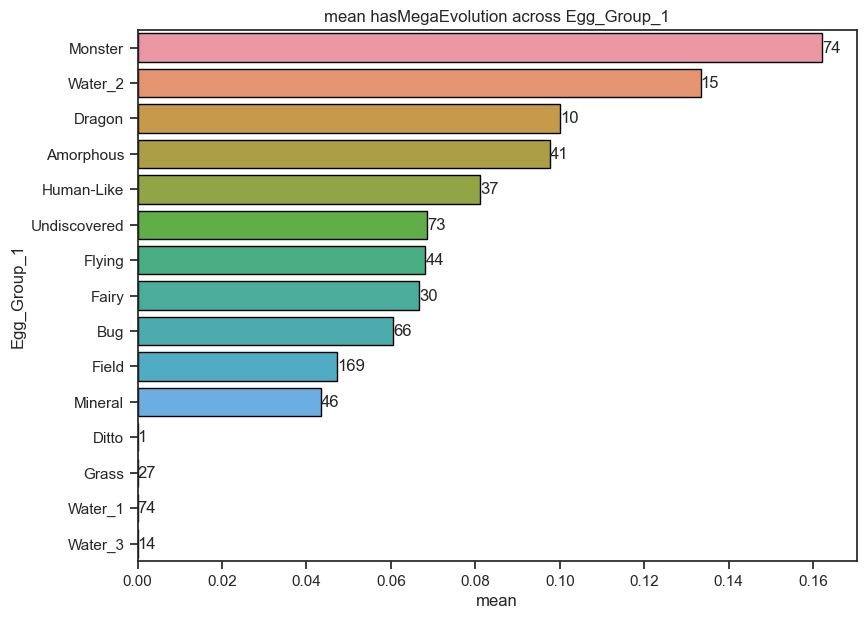

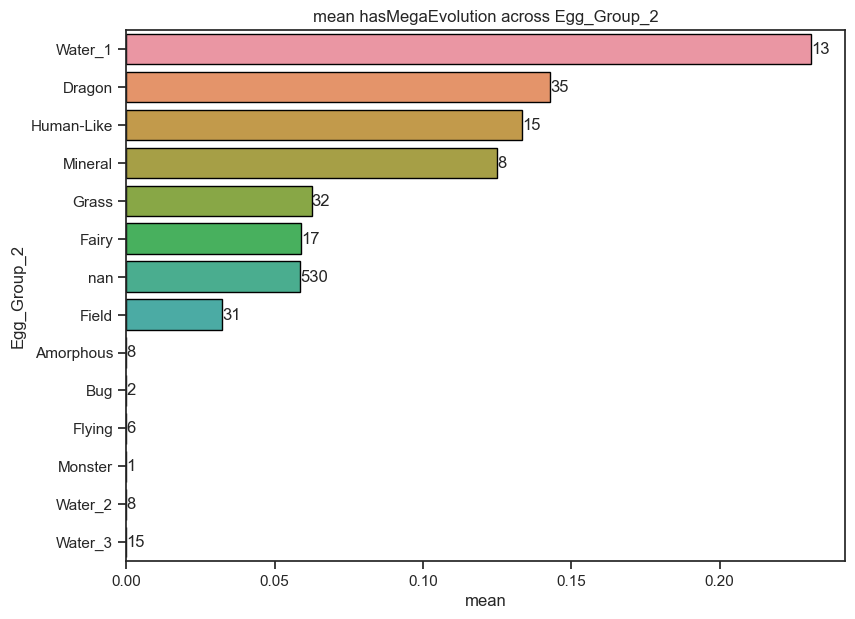

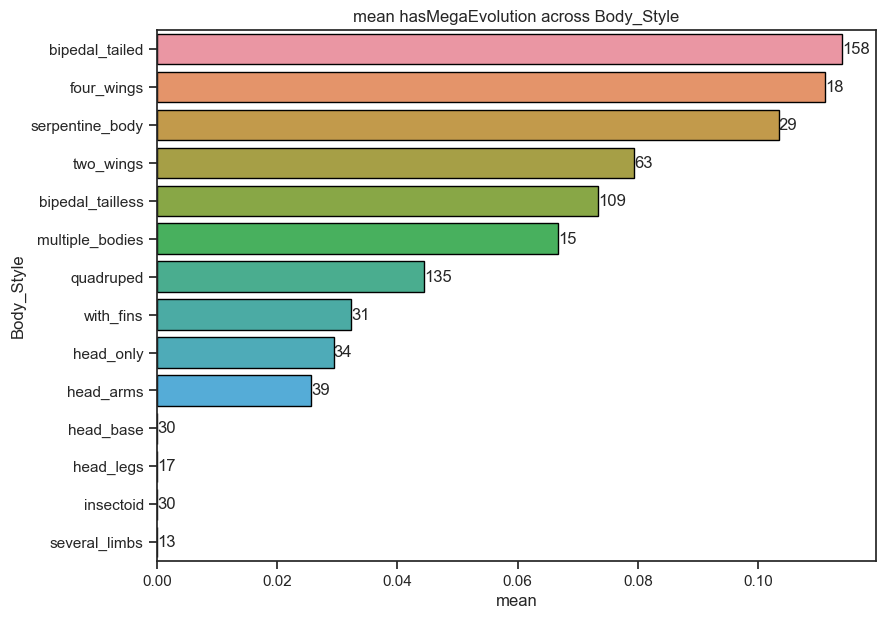

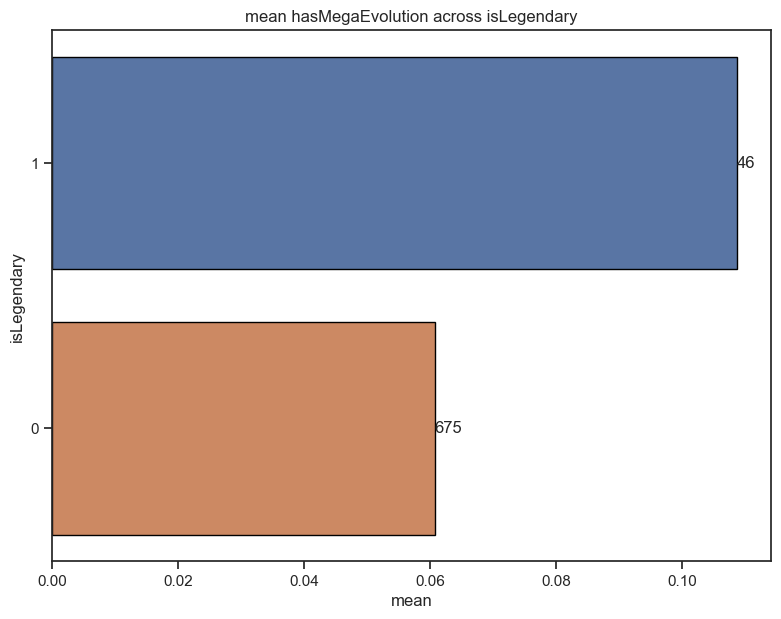

In [13]:
for feat in vis_cat_features:
    fig = cat_bar_plot(raw_data, feat, bin_target_col, agg_func_name="mean")

## Data preprocessing for classification and clustering

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

feat_trans = ColumnTransformer([("num_scaler", StandardScaler(with_mean=False), num_features),
                                ("cat_ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)])
full_feat_trans = ColumnTransformer(feat_trans.transformers)

data = raw_data

# Make full transformation for all dataset - required for clustering
X_train_test = full_feat_trans.fit_transform(data[features])

# Make transformation for test based on fitted on train pipeline - required for prediction
X_train_raw, X_test_raw, y_train, y_test = train_test_split(data[features], data[bin_target_col], random_state=28)
X_train = feat_trans.fit_transform(X_train_raw)
X_test = feat_trans.transform(X_test_raw)

C:\Users\Dimitry\miniconda3\envs\unimi\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
metric = {}
metric["name"] = "F1-Score" 
metric["func"] = f1_score
metric["scorer"] = make_scorer(f1_score, greater_is_better=True,
                             needs_threshold=False)

## Logistic regression

### Hyperparameter tuning

In [16]:
lr = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=3000)

param_grid = {'C': [10 ** k for k in range(-8, 6)]}
lr_grid = GridSearchCV(lr, param_grid, scoring=metric["scorer"], return_train_score=True)
lr_grid.fit(X_train, y_train);

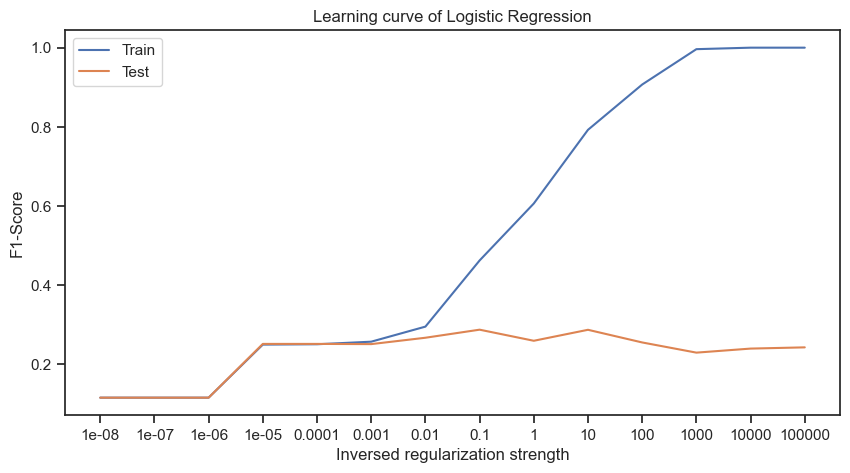

In [17]:
param = 'param_C'
param_values = lr_grid.cv_results_[param].data
train_score = lr_grid.cv_results_['mean_train_score']
test_score = lr_grid.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(10, 5))
x_line = list(range(len(param_values)))
sns.lineplot(x=x_line, y=train_score, label = 'Train', ax=ax)
sns.lineplot(x=x_line, y=test_score, label = 'Test', ax=ax)

ax.xaxis.set_ticks(x_line)
ax.xaxis.set_ticklabels(param_values)

plt.xlabel('Inversed regularization strength')
plt.ylabel(metric['name'])
plt.title('Learning curve of Logistic Regression')
ax.legend();

### Best estimator test results

Test report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       168
           1       0.19      0.38      0.26        13

    accuracy                           0.84       181
   macro avg       0.57      0.63      0.58       181
weighted avg       0.89      0.84      0.86       181



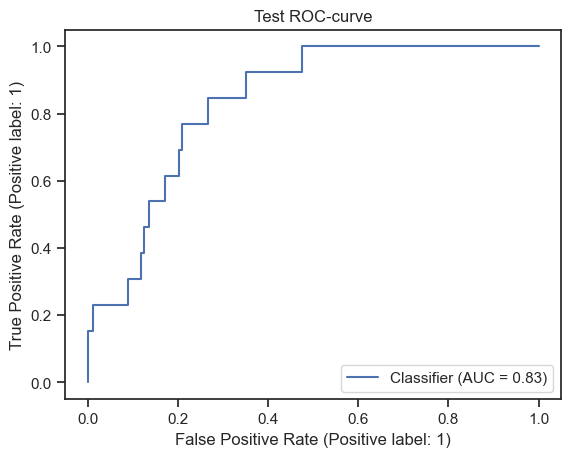

In [18]:
best_lr_params = lr_grid.best_estimator_.get_params()
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)
y_test_probs = best_lr.predict_proba(X_test)[:, 1]
y_test_preds = best_lr.predict(X_test)

print("Test report")
print(classification_report(y_test, y_test_preds))
RocCurveDisplay.from_predictions(y_test, y_test_probs)
plt.title("Test ROC-curve");

### Feature Importance

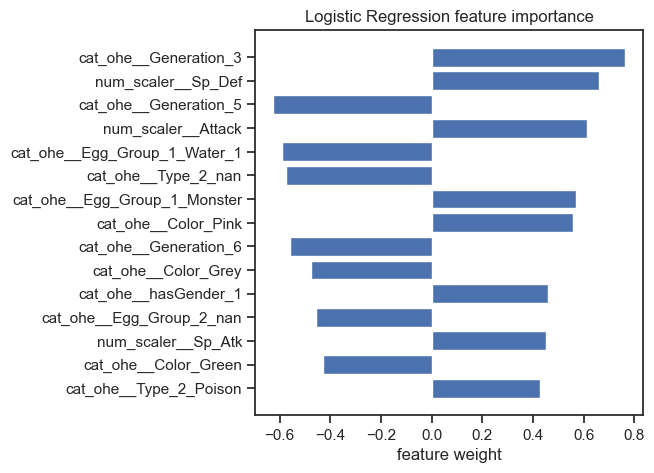

In [19]:
top_n = 15

lr_feat_imp = pd.DataFrame({"weight": best_lr.coef_[0], "feature": feat_trans.get_feature_names_out()})
lr_feat_imp["abs_weight"] = abs(lr_feat_imp["weight"])
lr_feat_imp = lr_feat_imp.sort_values(by=["abs_weight"])

fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Logistic Regression feature importance")
plt.xlabel("feature weight")
plt.barh(y="feature", width="weight", data=lr_feat_imp[-top_n:]);

## Principal Component Analysis

### Two-dimensional visualization

Apply PCA, take two main components and visuzliae the target distribution in the dimensionally reducted space

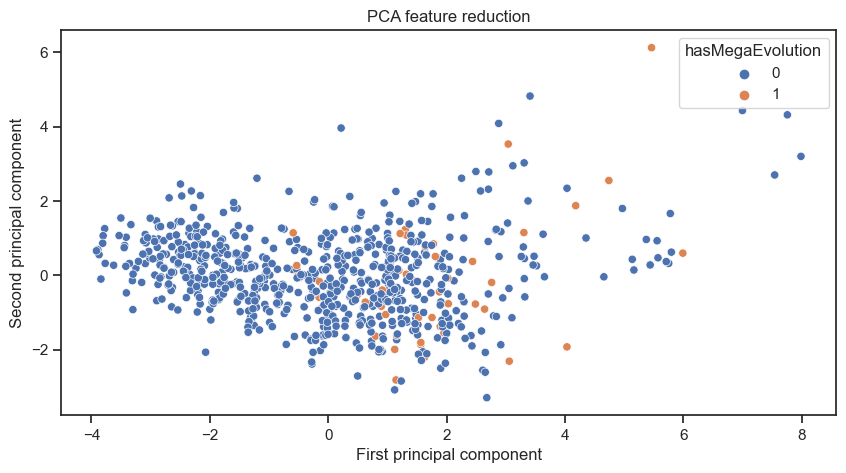

In [20]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_train_test.toarray())

plt.figure(figsize=(10, 5))
plt.title('PCA feature reduction')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
sns.scatterplot(x=reduced_X[:, 0], y=reduced_X[:, 1], hue=data[bin_target_col]);

### Number of components selection

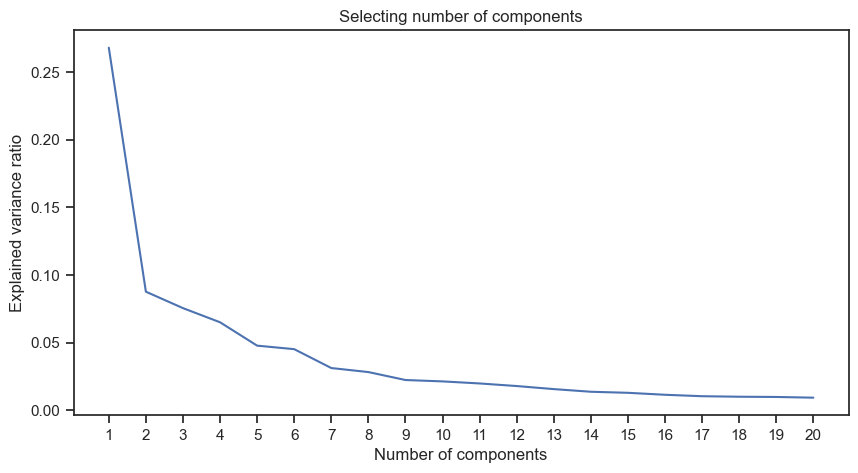

In [21]:
n_comps = 20
list_comps = list(range(1, n_comps + 1))
pca = PCA(n_components=20)
pca.fit(X_train_test.toarray())

fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_ticks(list_comps)
ax.xaxis.set_ticklabels(list_comps)
sns.lineplot(x=list_comps, y=pca.explained_variance_ratio_, ax=ax)

plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Selecting number of components');

In [22]:
best_n = 10

pca = PCA(n_components=best_n)
X_train_test_pred = pca.fit_transform(X_train_test.toarray())

print(f"%.2f%% - Explained variance by {best_n} components" % (pca.explained_variance_ratio_.sum() * 100))

69.20% - Explained variance by 10 components


## Non-linear PCA

### Two-dimensional visualization

Apply PCA, take two main components and visuzliae the target distribution in the dimensionally reducted space

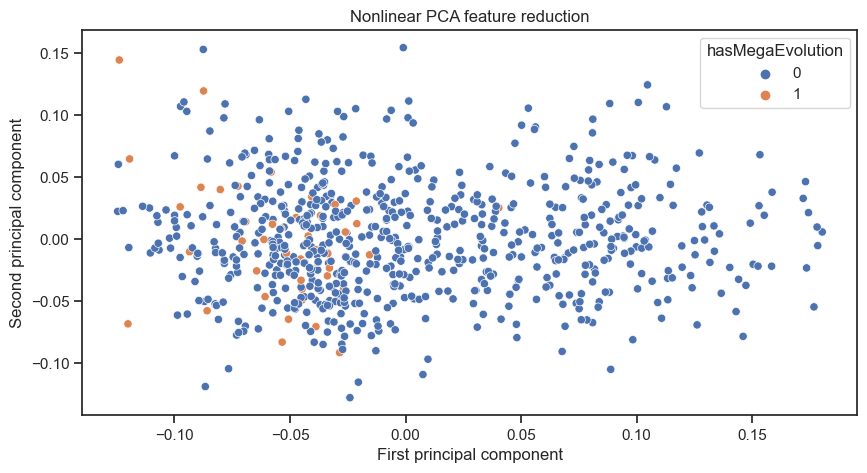

In [23]:
pca = KernelPCA(n_components=2, kernel="sigmoid")
reduced_X = pca.fit_transform(X_train_test.toarray())

plt.figure(figsize=(10, 5))
plt.title('Nonlinear PCA feature reduction')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
sns.scatterplot(x=reduced_X[:, 0], y=reduced_X[:, 1], hue=data[bin_target_col]);

### Number of components selection

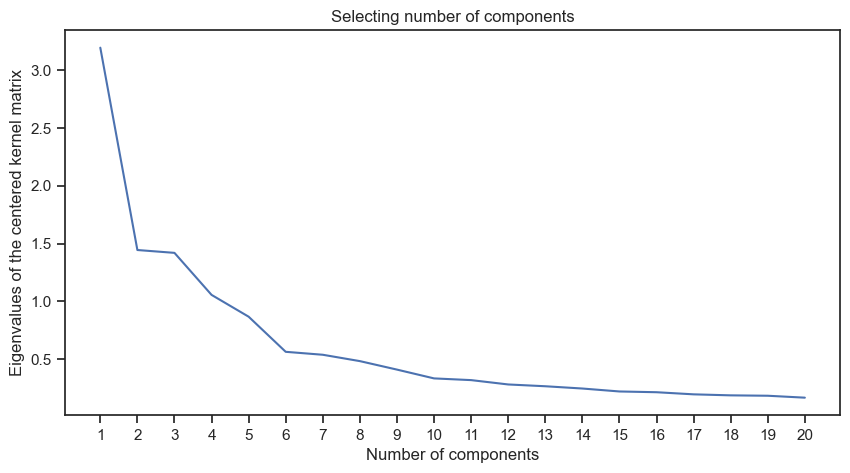

In [24]:
n_comps = 20
list_comps = list(range(1, n_comps + 1))
pca = KernelPCA(n_components=20, kernel="sigmoid")
pca.fit(X_train_test.toarray())

fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_ticks(list_comps)
ax.xaxis.set_ticklabels(list_comps)
sns.lineplot(x=list_comps, y=pca.eigenvalues_, ax=ax)

plt.xlabel('Number of components')
plt.ylabel('Eigenvalues of the centered kernel matrix')
plt.title('Selecting number of components');

In [25]:
best_n = 10

pca = KernelPCA(n_components=best_n, kernel="sigmoid")
X_train_test_pred = pca.fit_transform(X_train_test.toarray())

## DBSCAN

Apply DBSCAN algorithm on the output of the KernelPCA with 10 components

In [26]:
epss = [0.035, 0.037, 0.040, 0.041, 0.042, 0.043, 0.044, 0.0445, 0.045, 0.048, 0.0499, 0.05]

scores = []
n_clusters = []
n_noisy = []

for eps in tqdm(epss):
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X_train_test_pred)
    
    n_noisy.append(len(labels[labels == -1]))
    n = np.unique(labels[labels >= 0]).shape[0]
    n_clusters.append(n)
    if n > 1:
        scores.append(silhouette_score(X_train_test[labels[labels != -1]], labels[labels != -1]))
    else:
        scores.append(0)

  0%|          | 0/12 [00:00<?, ?it/s]

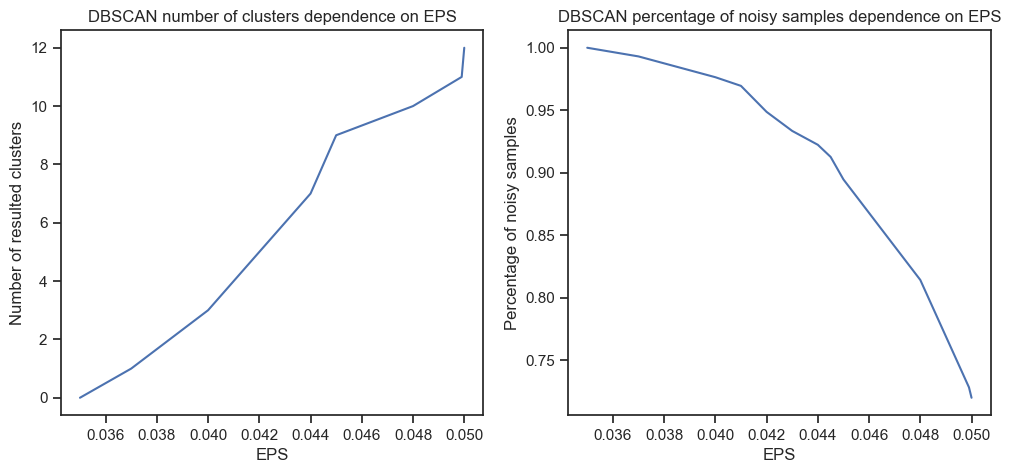

In [27]:
perc_noisy = np.array(n_noisy) / X_train_test.shape[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=epss, y=n_clusters, ax=axs[0])
axs[0].set_xlabel('EPS')
axs[0].set_ylabel('Number of resulted clusters')
axs[0].set_title("DBSCAN number of clusters dependence on EPS")

sns.lineplot(x=epss, y=perc_noisy, ax=axs[1])
axs[1].set_xlabel('EPS')
axs[1].set_ylabel('Percentage of noisy samples');
axs[1].set_title("DBSCAN percentage of noisy samples dependence on EPS");

## Agglomerative Clustering

  0%|          | 0/9 [00:00<?, ?it/s]

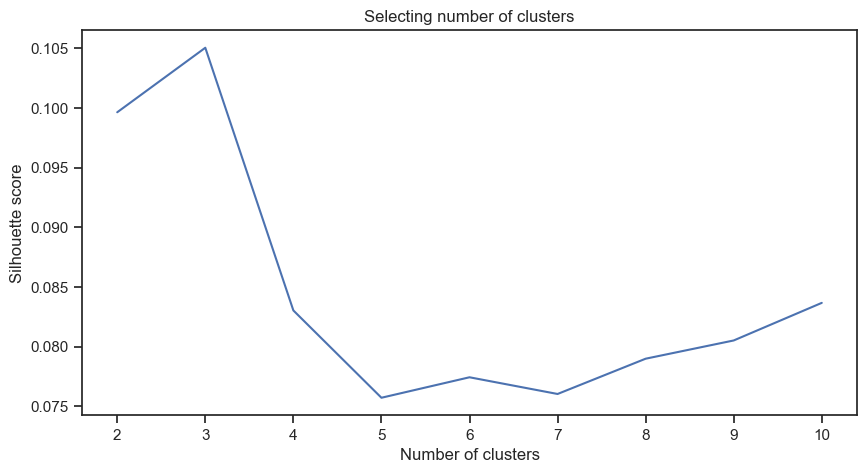

In [28]:
n_clust = list(range(2, 11))
scores = []

for n in tqdm(n_clust):
    hier = AgglomerativeClustering(n_clusters=n)
    labels = hier.fit_predict(X_train_test.toarray())
    scores.append(silhouette_score(X_train_test, labels))
    
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=n_clust, y=scores, ax=ax)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Selecting number of clusters');

In [29]:
class HierarchicalClustering(AgglomerativeClustering):
    """Native scikit-learn AgglomerativeClustering class does not have 'predict' method
    which is required for the SilhouetteVisualizer.
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    
    def predict(self, X, y=None):
        return self.fit_predict(X)

best_k = 3
best_hier = HierarchicalClustering(n_clusters=best_k)

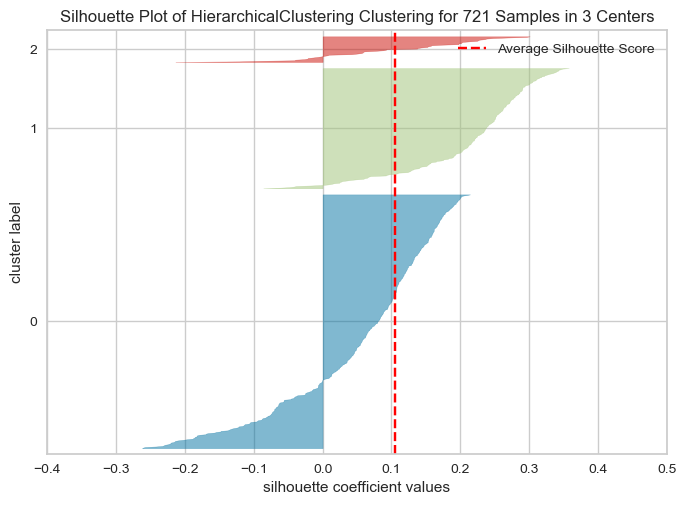

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(best_hier, colors='yellowbrick')
visualizer.fit(X_train_test.toarray())
visualizer.show();

## Clustering results interpretation

In [31]:
data["label"] = best_hier.fit_predict(X_train_test.toarray())

data[num_features + ["label"]].groupby("label").mean()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate
label,,,,,,,,,,
0,73.129103,79.730853,73.986871,77.234136,76.485777,73.557987,0.574945,1.144289,47.991028,68.866521
1,50.645161,56.990783,56.552995,46.124424,49.539171,47.317972,0.490783,0.616083,19.541935,181.451613
2,104.085106,112.361702,105.723404,90.531915,90.531915,74.382979,0.545213,3.593617,314.065957,30.446809


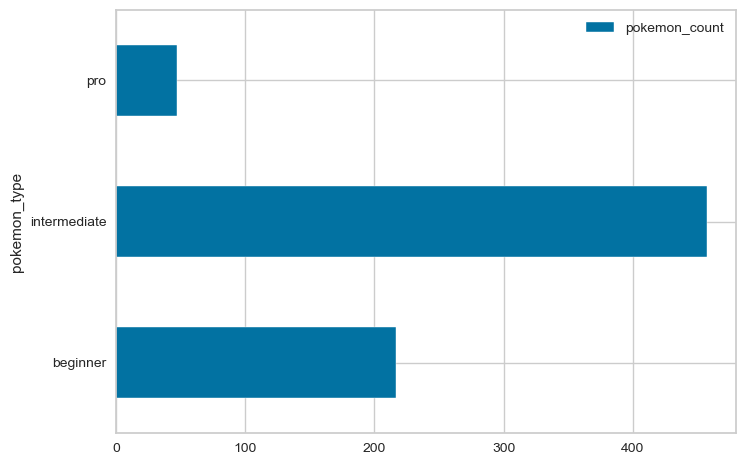

In [32]:
data["pokemon_type"] = data["label"].map({1: "beginner", 0: "intermediate", 2: "pro"})
data.groupby("pokemon_type").size().to_frame().rename(columns={0: "pokemon_count"}).plot(kind="barh");

### PCA clustering visualization

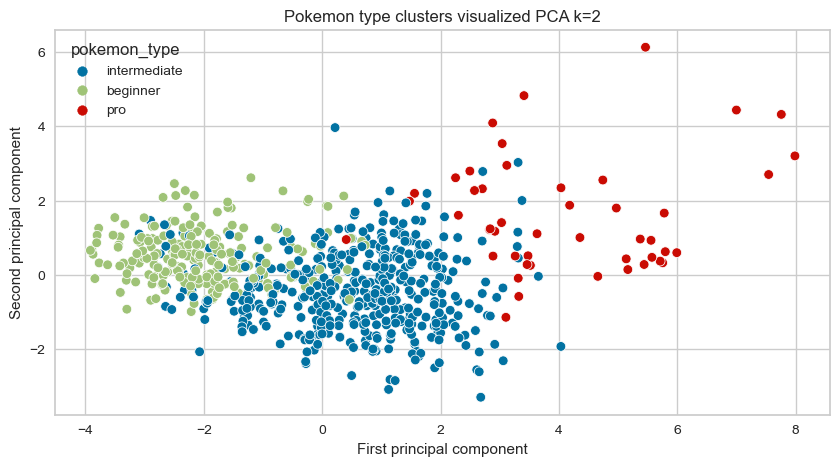

In [33]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_train_test.toarray())

plt.figure(figsize=(10, 5))
plt.title('Pokemon type clusters visualized PCA k=2')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
sns.scatterplot(x=reduced_X[:, 0], y=reduced_X[:, 1], hue=data["pokemon_type"]);

## Generalized Linear Models

### Data preprocessing

In [34]:
cat_features = all_cat_features
num_features = [n for n in all_num_features if n != num_target_col]
features = cat_features + num_features

print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")
print(f"Numerical target: {num_target_col}")

Numerical features: ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg']
Categorical features: ['Type_1', 'Type_2', 'Generation', 'Color', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style', 'isLegendary', 'hasMegaEvolution']
Numerical target: Catch_Rate


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

feat_trans = ColumnTransformer([("num_scaler", StandardScaler(with_mean=False), num_features),
                                ("cat_ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)])
full_feat_trans = ColumnTransformer(feat_trans.transformers)

data = raw_data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(data[features], data[num_target_col], random_state=28)
X_train = feat_trans.fit_transform(X_train_raw)
X_test = feat_trans.transform(X_test_raw)

C:\Users\Dimitry\miniconda3\envs\unimi\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Hyperparameter tuning

In [36]:
metric = {}
metric["name"] = "R2 score" 
metric["func"] = r2_score
metric["scorer"] = make_scorer(r2_score, greater_is_better=True,
                             needs_threshold=False)

In [37]:
from sklearn.linear_model import TweedieRegressor

tr = TweedieRegressor(solver='lbfgs', max_iter=3000)

param_grid = {
    'power': [0, 1, 1.5, 2, 2.5, 3],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10, 20, 30]
}

tr_grid = GridSearchCV(tr, param_grid, scoring=metric["scorer"], return_train_score=True)
tr_grid.fit(X_train, y_train);

In [38]:
cv_results = dict((str(p), {"alpha": [], "train_score": [], "test_score": []}) for p in param_grid["power"])
for power, alpha, train_r2, val_r2 in zip(tr_grid.cv_results_["param_power"], 
                        tr_grid.cv_results_["param_alpha"],
                       tr_grid.cv_results_['mean_train_score'],
                       tr_grid.cv_results_['mean_test_score']):
    cv_results[str(power)]["alpha"].append(alpha)
    cv_results[str(power)]["train_score"].append(train_r2)
    cv_results[str(power)]["test_score"].append(val_r2)

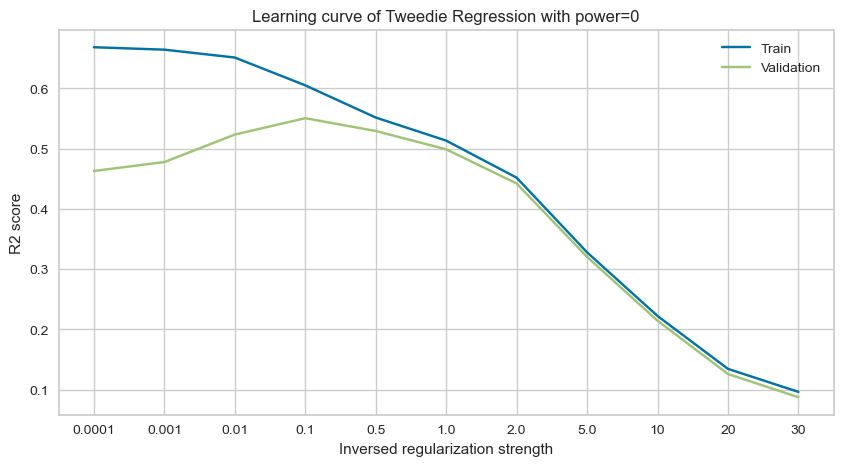

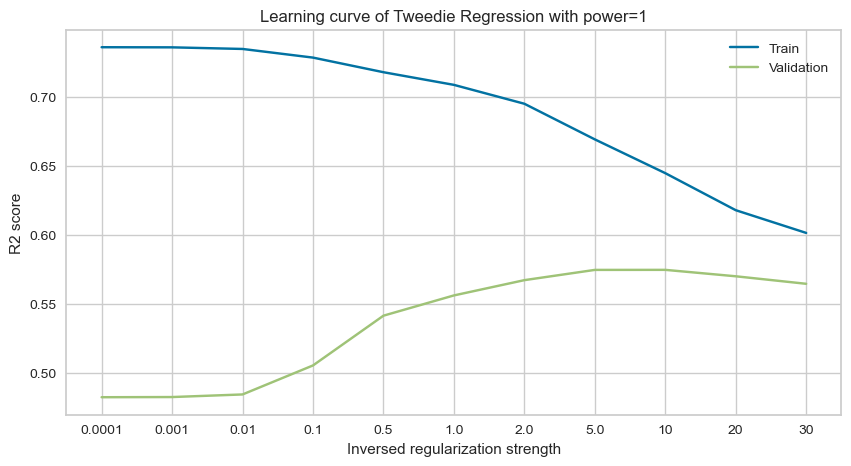

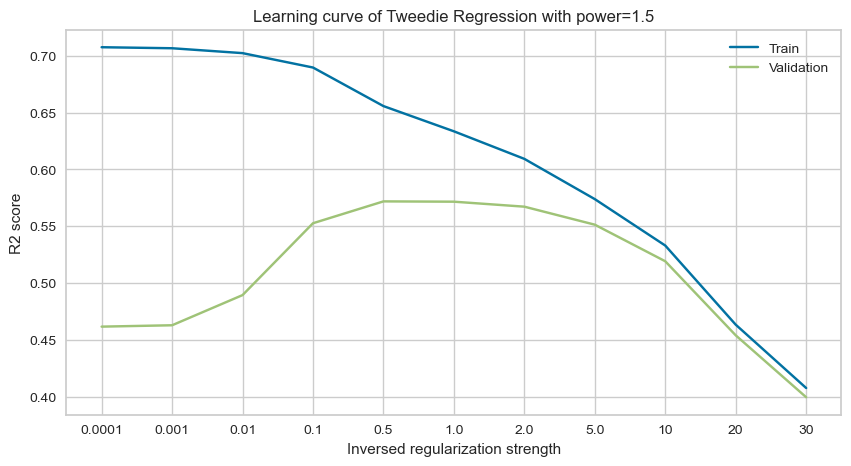

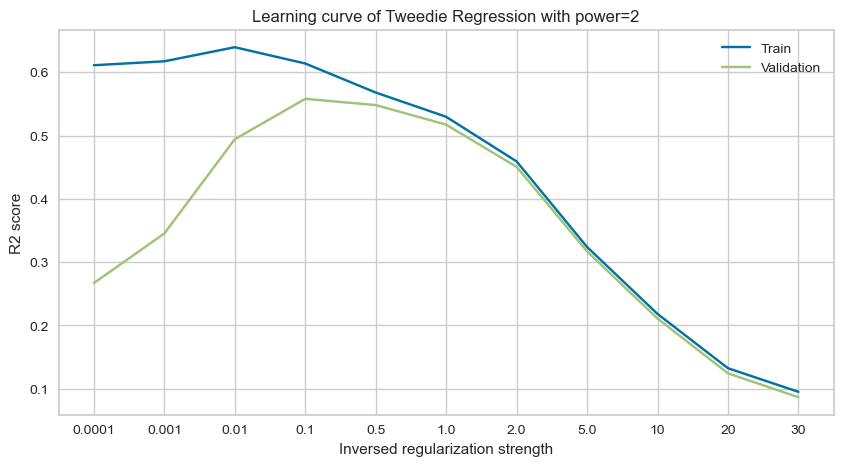

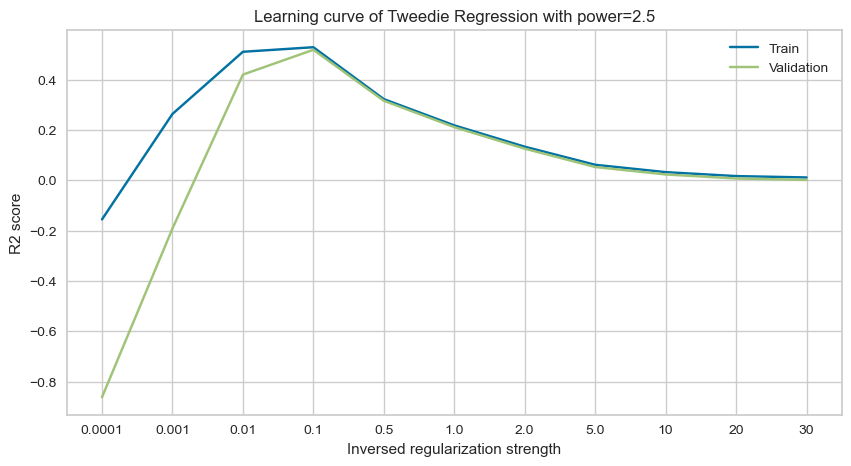

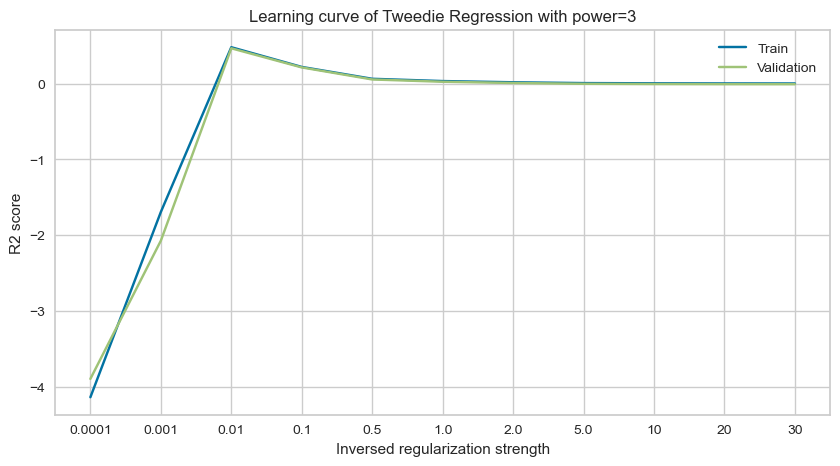

In [42]:
for power, res in cv_results.items():
    fig, ax = plt.subplots(figsize=(10, 5))
    x_line = list(range(len(res["alpha"])))
    sns.lineplot(x=x_line, y=res["train_score"], label = 'Train', ax=ax)
    sns.lineplot(x=x_line, y=res["test_score"], label = 'Validation', ax=ax)
    
    plt.grid()
    ax.xaxis.set_ticks(x_line)
    ax.xaxis.set_ticklabels(res["alpha"])

    plt.xlabel('Inversed regularization strength')
    plt.ylabel(metric['name'])
    plt.title(f'Learning curve of Tweedie Regression with power={power}')
    ax.legend();

In [43]:
print(f"Best model validation results R2={round(tr_grid.best_score_, 3)} with params={tr_grid.best_estimator_.get_params()}")

Best model validation results R2=0.575 with params={'alpha': 10, 'fit_intercept': True, 'link': 'auto', 'max_iter': 3000, 'power': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Best model test results

In [44]:
best_tr_params = tr_grid.best_estimator_.get_params()
best_tr = TweedieRegressor(**best_tr_params)
best_tr.fit(X_train, y_train)
y_train_preds = best_tr.predict(X_train)
y_test_preds = best_tr.predict(X_test)

print(f"Train R2 score {round(r2_score(y_train, y_train_preds), 3)}; Test R2 score {round(r2_score(y_test, y_test_preds), 3)}")

Train R2 score 0.635; Test R2 score 0.717
